#Лабораторная работа №3

Решение задачи бинарной классификации с применением МГК, ЛДА и Decidion Tree, Random Forest, AdaBoost

Бинарная классификация

1. Использовать вектор признаков из ЛР№1
Далее сформирвоать 3 типа входных данных:
* Применить к вектору признаков PCA (из ЛР№1)
* Применить к вектору признаков LDA
* Применить к вектору признаков PCA (из ЛР№1) и после LDA

2. Для каждого типа векторов признакив применить 3 алгоитма классификации и получить метрики классифкации для тестового набора и в режиме кросс-валидации:
* DT (визуализировать дерево)
* RF
* AdaBoost

3. Подобрать параметры всех алгоритмов с GridSearch, получить новые значения точности классификации

4. Построить графики зависимости точности класификации от изменения 1 паремтра каждого алгоритма

5. Написать функцию, которая принимает на вход следующие параметры:
- выбранный алгоритм
- параметры алгоритма
- количестово главных компонет МГК, которые будут использоваться для классификации
- будет ли применяться после МГК ЛДА - True или False
- будет ли проводиться расчет точности по тестовой выборке или в режиме кросс валидации

5a. Проварьировать параметр дерева и построить график зависимости точности от параметра дерева

5b. Вывести график зависимости точности классификации DT от количества главных компонент



In [98]:
import os
import numpy as np
import pandas as pd
!pip install sklearn
import sklearn
from  matplotlib import pyplot as plt

In [84]:
sh = pd.read_csv('/Users/polilya/Desktop/маг/python_mag/ЛР1_CV/data_pca_sh.csv', delimiter=',')
features = pd.read_csv('/Users/polilya/Desktop/маг/python_mag/ЛР1_CV/featyres.csv', delimiter=',')
data_pca_full = pd.read_csv('/Users/polilya/Desktop/маг/python_mag/ЛР1_CV/data_pca_full.csv', delimiter=',')

In [47]:
#все данные для булевого анализа










features_l = features.join(data_pca_full["label_bool"], rsuffix='_right') 
features_l
features_l = features_l.drop(columns = ['Unnamed: 0'],axis = 1)
features_l

,0,1,2,3,4,5,6,7,8,9,...,36855,36856,36857,36858,36859,36860,36861,36862,36863,label_bool
0,104,84,52,39,32,22,22,23,25,28,...,79,52,43,42,52,55,67,90,98,1
1,20,36,60,82,95,89,87,84,79,80,...,141,163,166,162,164,165,168,166,166,1
2,3,3,3,2,24,85,102,67,47,51,...,128,126,101,135,168,185,216,175,0,1
3,8,23,27,16,17,31,56,80,97,114,...,166,173,186,147,118,102,98,119,108,1
4,28,56,88,131,164,176,177,173,174,174,...,35,64,112,118,140,118,73,77,83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,29,71,105,128,145,143,138,131,127,127,...,168,79,1,22,57,66,33,50,58,1
916,9,12,34,73,97,115,139,149,144,143,...,23,38,75,101,123,129,172,151,130,1
917,34,64,121,177,204,212,212,217,212,210,...,148,190,249,177,61,38,95,50,84,1
918,75,92,105,87,82,73,47,38,25,11,...,156,30,0,0,18,56,78,51,53,1


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(features_l['label_bool'])

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(features_l.iloc[:, 0:36864], y)


In [72]:
#lda.explained_variance_ratio_


In [ ]:
class sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd', 
                                                               shrinkage=None, priors=None,
                                                               n_components=None, store_covariance=False, 
                                                               tol=0.0001, covariance_estimator=None)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

лда для данных без пца












In [73]:
#define predictor and response variables
X = features_l.iloc[:, 0:36863]
y = data_pca_full["label_bool"]

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [74]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   



0.6557971014492754


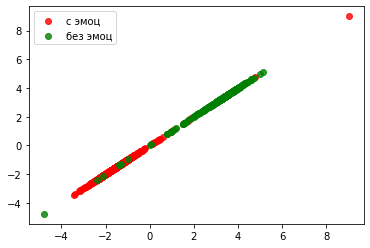

In [194]:
#define data to plot
X = features_l.iloc[:, 0:36863]
y = data_pca_full["label_bool"]

#model = LinearDiscriminantAnalysis(n_components=5)
model = LinearDiscriminantAnalysis(n_components=1)
data_plot = model.fit(X, y).transform(X)
target_names = ["с эмоц","без эмоц"]

#create LDA plot
plt.figure()
colors = ['red', 'green']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 0], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

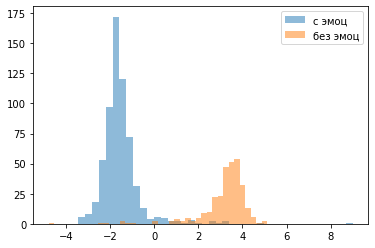

In [184]:
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.hist(data_plot[y == i, 0],bins=40,
                label=target_name,stacked=True, alpha = 0.5 )
    
#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

дла для данных, прошедших пца

In [181]:
#define predictor and response variables
X = data_pca_full.iloc[:, 0:145]
y = data_pca_full["label"]


#print (X)
#Fit the LDA model
model_pca_lda1 = LinearDiscriminantAnalysis()
model_pca_lda1.fit(X, y)

LinearDiscriminantAnalysis()

In [182]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model_pca_lda1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.563768115942029


(920, 1)


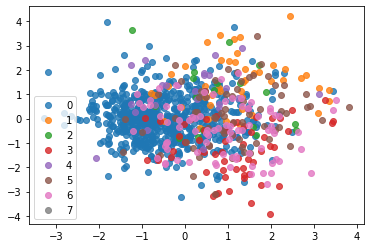

In [165]:
#define data to plot
X = data_pca_full.iloc[:, 0:145]
y = data_pca_full["label"]
model_pca_lda1 = LinearDiscriminantAnalysis()
data_plot = model_pca_lda1.fit(X, y).transform(X)
#target_names = ["без эмоций", "c эмоций"]
target_names = ['0','1','2','3','4','5','6','7']

#create LDA plot
plt.figure()
colors = ['red', 'green','blue', 'black','red', 'green','blue', 'black']
lw = 2
for color, i, target_name in zip(colors, [0, 1,2,3,4,5,6,7], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8,
                label=target_name)
    
#for color, i, target_name in zip(colors, [0, 1], target_names):
#    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 0], alpha=.8,
#                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [166]:
print (data_plot.shape)

(920, 6)


In [161]:
#define predictor and response variables
X = data_pca_full.iloc[:, 0:145]
y = data_pca_full["label_bool"]

#Fit the LDA model
model_pca_lda2 = LinearDiscriminantAnalysis()
model_pca_lda2.fit(X, y)

#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model_pca_lda2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.6880434782608696


In [191]:
print (X.shape)

(920, 145)


In [196]:
#define data to plot
X = data_pca_full.iloc[:, 0:145]
y = data_pca_full["label_bool"]
#model_pca_lda2 = LinearDiscriminantAnalysis()
model_pca_lda2 = LinearDiscriminantAnalysis(n_components=2)
data_plot = model_pca_lda2.fit(X, y).transform(X)
X_train = lda.fit_transform(X_train, y_train)
#target_names = ["без эмоций", "c эмоций"]
target_names = ['0','1']

#create LDA plot
plt.figure()
colors = ['red', 'green','blue', 'black','red', 'green','blue', 'black']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8,
                label=target_name)
    
#for color, i, target_name in zip(colors, [0, 1], target_names):
#    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 0], alpha=.8,
#                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [200]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
data_plot = model.fit(X, y).transform(X)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
#print (data_plot)
print (scores)

Mean Accuracy: 0.891 (0.019)
[0.87724551 0.88888889 0.90690691 0.9011976  0.91291291 0.85585586]


In [168]:
print (data_plot.shape)

(920, 1)


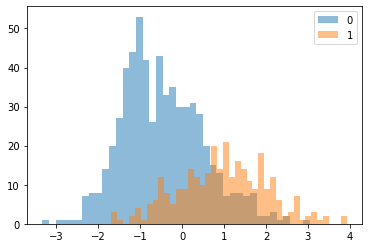

In [178]:
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.hist(data_plot[y == i, 0],bins=40,
                label=target_name,stacked=True, alpha = 0.5 )
    
#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

Бинарная классификация

Использовать вектор признаков из ЛР№1 Далее сформирвоать 3 типа входных данных:
Применить к вектору признаков PCA (из ЛР№1) - есть в лр 1 - визуализировать нельзя
Применить к вектору признаков LDA - есть
Применить к вектору признаков PCA (из ЛР№1) и после LDA - есть

промежуточный вывод
сравнивая две гистограммы - очевидно, что разделение просто лда по всем признакам на много заметнее, чем лда после прохождения пца до 144 компонент

задание 2


Для каждого типа векторов признакив применить 3 алгоитма классификации и получить метрики классифкации для тестового набора и в режиме кросс-валидации:
DT (визуализировать дерево)
RF
AdaBoost

In [209]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tqdm import tqdm
from scipy.ndimage.filters import gaussian_filter

import PIL.Image
import PIL.ImageDraw

import collections
from matplotlib import pyplot
import pylab as pl
import glob
import zipfile

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [210]:

data_pca_full

# данные без нижения размерности
Xnopca = features_l.iloc[:, 0:36863]
y = data_pca_full["label_bool"]
# данные после пца
Xpca = data_pca_full.iloc[:, 0:145]
y = data_pca_full["label_bool"]


In [236]:
data_train, data_test, classes_train, classes_test = train_test_split(Xpca, y, test_size = 0.33,  stratify=y, random_state = 3)


Точность модели на обучающей выборке:  0.83
Точность модели на тестовой выборке:  0.65


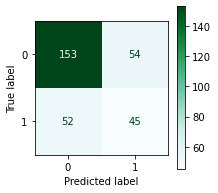

In [237]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(data_train, classes_train)
LDA_prediction = LDA_model.predict(data_test)

LDA_train_accuracy = LDA_model.score(data_train, classes_train)
LDA_test_accuracy = LDA_model.score(data_test, classes_test)
print ('Точность модели на обучающей выборке: ', round (LDA_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (LDA_test_accuracy, 2))

fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay(confusion_matrix(LDA_prediction, classes_test))
disp.plot(cmap = 'BuGn', ax=ax);

In [220]:
data_train, data_test, classes_train, classes_test = train_test_split(Xnopca, y, test_size = 0.33,  stratify=y, random_state = 1)



Точность модели на обучающей выборке:  0.98
Точность модели на тестовой выборке:  0.64


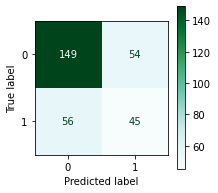

In [223]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(data_train, classes_train)
LDA_prediction = LDA_model.predict(data_test)

LDA_train_accuracy = LDA_model.score(data_train, classes_train)
LDA_test_accuracy = LDA_model.score(data_test, classes_test)
print ('Точность модели на обучающей выборке: ', round (LDA_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (LDA_test_accuracy, 2))

fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay(confusion_matrix(LDA_prediction, classes_test))
disp.plot(cmap = 'BuGn', ax=ax);

In [228]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
random.seed(17)

In [ ]:
по всем фичам

Точность модели на обучающей выборке:  1.0
Точность модели на тестовой выборке:  0.63


{'max_depth': 2, 'min_samples_leaf': 1}

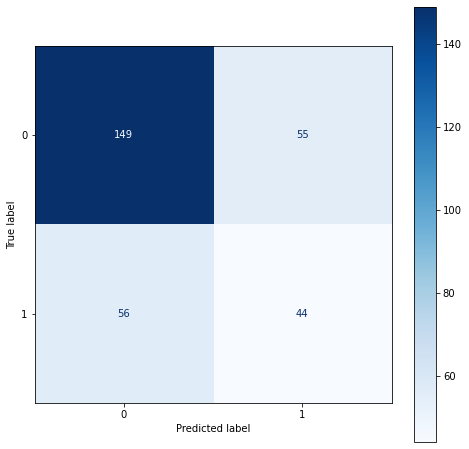

In [232]:
res_test = data_test
res_train = data_train



DT_model = tree.DecisionTreeClassifier()
DT_model.fit(res_train, classes_train)
DT_prediction = DT_model.predict(res_test)

DT_train_accuracy = DT_model.score(res_train, classes_train)
DT_test_accuracy = DT_model.score(res_test, classes_test)
print ('Точность модели на обучающей выборке: ', round (DT_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (DT_test_accuracy, 2))


par = {'max_depth' : range(1, 20), 'min_samples_leaf' : range(1, 10)}
search = GridSearchCV(DT_model,par,cv=10)
search.fit(res_train, classes_train)
search.best_params_

Точность модели на обучающей выборке:  0.73
Точность модели на тестовой выборке:  0.65


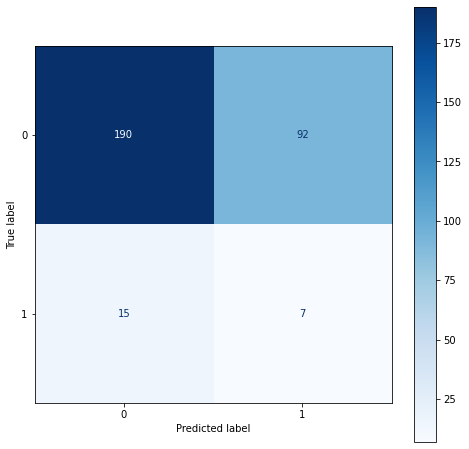

In [235]:
DT_model = tree.DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 1)
DT_model.fit(res_train, classes_train)
DT_prediction = DT_model.predict(res_test)

DT_train_accuracy = DT_model.score(res_train, classes_train)
DT_test_accuracy = DT_model.score(res_test, classes_test)
print ('Точность модели на обучающей выборке: ', round (DT_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (DT_test_accuracy, 2))

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix(DT_prediction, classes_test))
disp.plot(cmap = 'Blues', ax=ax);

In [ ]:
по пцашным данным

In [238]:
res_test = data_test
res_train = data_train



DT_model = tree.DecisionTreeClassifier()
DT_model.fit(res_train, classes_train)
DT_prediction = DT_model.predict(res_test)

DT_train_accuracy = DT_model.score(res_train, classes_train)
DT_test_accuracy = DT_model.score(res_test, classes_test)
print ('Точность модели на обучающей выборке: ', round (DT_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (DT_test_accuracy, 2))


par = {'max_depth' : range(1, 20), 'min_samples_leaf' : range(1, 10)}
search = GridSearchCV(DT_model,par,cv=10)
search.fit(res_train, classes_train)
search.best_params_

Точность модели на обучающей выборке:  1.0
Точность модели на тестовой выборке:  0.62


{'max_depth': 2, 'min_samples_leaf': 1}

In [239]:
# данные после пца
Xpca = data_pca_full.iloc[:, 0:145]
y = data_pca_full["label_bool"]


In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.3, random_state=44)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [241]:
predictions = rf_model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [243]:
errors = abs(predictions - y_test)
errors 

137    1
693    0
672    0
664    0
478    0
      ..
545    0
416    0
208    0
44     0
563    0
Name: label_bool, Length: 276, dtype: int64

In [248]:
rf_train_accuracy = rf_model.score(X_train, y_train)
rf_test_accuracy = rf_model.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (rf_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (rf_test_accuracy, 2))

Точность модели на обучающей выборке:  1.0
Точность модели на тестовой выборке:  0.68


In [ ]:
делаю рендомфорест на пцашных данных